In [49]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

In [50]:
dataset=pd.read_csv('spam.csv',encoding = "latin-1")

In [51]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
dataset=dataset.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
dataset=dataset.rename(columns={"v1" : "Target" , "v2" : "Message"})
dataset["Length"]=dataset["Message"].str.len()

In [53]:
dataset.head()

,Target,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [54]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
Target     5572 non-null object
Message    5572 non-null object
Length     5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None


# Visualization

ham     4825
spam     747
Name: Target, dtype: int64


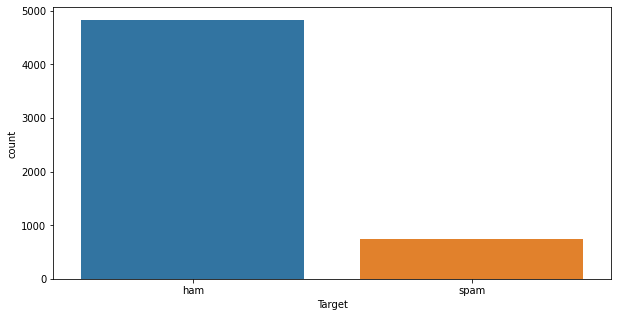

In [55]:
# How many spam messages and ham messages in the dataset
plt.figure(figsize=(10,5))
# seaborn: statistical data visualization
sns.countplot(data=dataset,x="Target")
print(dataset["Target"].value_counts())

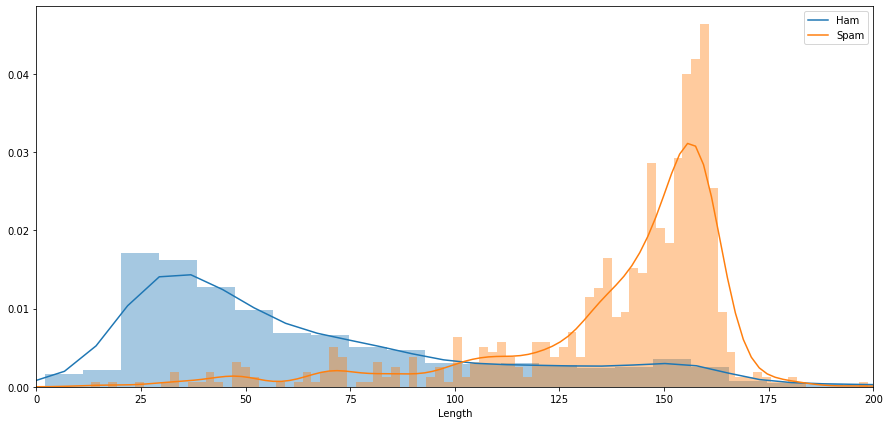

In [56]:
# we understand from this figure that the spam messages tends to have the large length more than ham messages
plt.figure(figsize=(15,7))
plt.xlim(0,200)
sns.distplot(dataset.loc[dataset["Target"]=="ham"]["Length"],kde_kws={"label":"Ham"},bins=100)
sns.distplot(dataset.loc[dataset["Target"]=="spam"]["Length"],kde_kws={"label":"Spam"},bins=100)


# Visualization [ wordcloud ]

In [57]:
#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

# Spam_Visualization

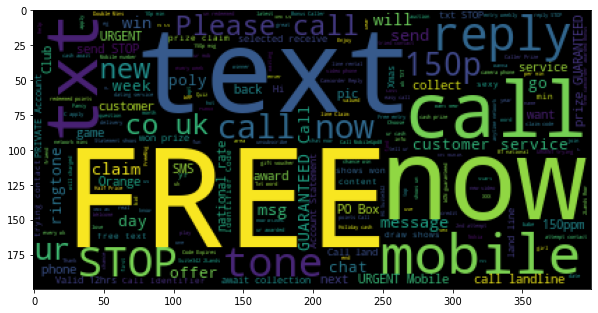

In [58]:
spam_list=dataset[dataset["Target"] == "spam"]["Message"].unique().tolist()
spam=" ".join(spam_list)
spam_worldcloud=WordCloud().generate(spam)
plt.figure(figsize=(10,8))
plt.imshow(spam_worldcloud)
plt.show()

# Ham_Visualization

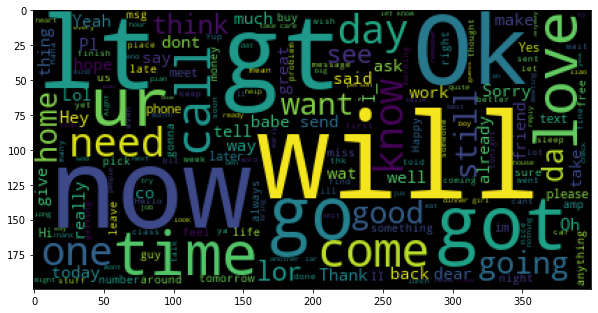

In [59]:
ham_list=dataset[dataset["Target"] == "ham"]["Message"].unique().tolist()
ham=" ".join(ham_list)
ham_wordcloud=WordCloud().generate(ham)
plt.figure(figsize=(10,8))
plt.imshow(ham_wordcloud)
plt.show()

In [60]:
data1=dataset.copy()
data1.head()

,Target,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Preprocess the dataset

In [61]:
# Firstly we need to convert the column Target to binary data as 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(data1['Target'])
data1['Target']=y

In [62]:
data1.head()

,Target,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
text_messages=data1['Message']
#print(text_messages[:10])

In [64]:
# Secondly we will clean the data for alot of something
Email=r'^.+@.*\.[A-Za-z0-9]{2,}$'
Url=r'^http://\S*'
MoneySymbol=r'\u20AC|\$'
NormalNumber=r'\d+(\.\d+)?'
PhoneNumber=r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$'
Punctuation=r'[^\w\d\s]'
StopWords = set(stopwords.words('english'))
def Clean_Data(text):
    text=re.sub(Email,"",text)
    text=re.sub(Url,"",text)
    text=re.sub(MoneySymbol,"moneysymb",text)
    text=re.sub(PhoneNumber,"phonenumber",text)
    text=re.sub(NormalNumber,"number",text)
    text=re.sub(Punctuation,"",text)
    text=str.lower(text)
    text=[nltk.PorterStemmer().stem(w)  for w in text.split() if w not in StopWords]
    return " ".join(text)


In [65]:
CleanMessages=[Clean_Data(w) for w in data1.Message]

In [66]:
data1['Message']=CleanMessages

In [67]:
data1.head()

,Target,Message,Length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri number wkli comp win fa cup final t...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61


# Tokenization

In [68]:
from  nltk.tokenize import word_tokenize
tokenizer = nltk.tokenize.WhitespaceTokenizer()
data1['Tokenized'] = data1['Message'].apply(tokenizer.tokenize)

In [69]:
from nltk.util import bigrams
data1['Tokenized'].apply(lambda row: list(nltk.ngrams(row, 2)))

0       [(go, jurong), (jurong, point), (point, crazi)...
1       [(ok, lar), (lar, joke), (joke, wif), (wif, u)...
2       [(free, entri), (entri, number), (number, wkli...
3       [(u, dun), (dun, say), (say, earli), (earli, h...
4       [(nah, dont), (dont, think), (think, goe), (go...
5       [(freemsg, hey), (hey, darl), (darl, number), ...
6       [(even, brother), (brother, like), (like, spea...
7       [(per, request), (request, mell), (mell, mell)...
8       [(winner, valu), (valu, network), (network, cu...
9       [(mobil, number), (number, month), (month, u),...
10      [(im, gonna), (gonna, home), (home, soon), (so...
11      [(six, chanc), (chanc, win), (win, cash), (cas...
12      [(urgent, number), (number, week), (week, free...
13      [(ive, search), (search, right), (right, word)...
14                                       [(date, sunday)]
15      [(xxxmobilemovieclub, use), (use, credit), (cr...
16                              [(oh, kim), (kim, watch)]
17      [(eh, 

In [70]:
data1['Tokenized'].apply(lambda row: list(nltk.ngrams(row, 3)))

0       [(go, jurong, point), (jurong, point, crazi), ...
1       [(ok, lar, joke), (lar, joke, wif), (joke, wif...
2       [(free, entri, number), (entri, number, wkli),...
3       [(u, dun, say), (dun, say, earli), (say, earli...
4       [(nah, dont, think), (dont, think, goe), (thin...
5       [(freemsg, hey, darl), (hey, darl, number), (d...
6       [(even, brother, like), (brother, like, speak)...
7       [(per, request, mell), (request, mell, mell), ...
8       [(winner, valu, network), (valu, network, cust...
9       [(mobil, number, month), (number, month, u), (...
10      [(im, gonna, home), (gonna, home, soon), (home...
11      [(six, chanc, win), (chanc, win, cash), (win, ...
12      [(urgent, number, week), (number, week, free),...
13      [(ive, search, right), (search, right, word), ...
14                                                     []
15      [(xxxmobilemovieclub, use, credit), (use, cred...
16                                     [(oh, kim, watch)]
17      [(eh, 

In [71]:
from nltk.tokenize import word_tokenize
allwords=[]
for message in CleanMessages:
    words=word_tokenize(message)
    for w in words:
        allwords.append(w)

In [72]:
# Apply the frequency distributions after we tokenized the messages
freqdist = nltk.FreqDist(allwords)
print(freqdist)
print("Most Common Words {}".format(freqdist.most_common(15)))

<FreqDist with 7342 samples and 52411 outcomes>
Most Common Words [('number', 2340), ('u', 1119), ('call', 653), ('im', 463), ('go', 449), ('get', 446), ('ur', 384), ('come', 297), ('dont', 279), ('ok', 277), ('ltgt', 276), ('free', 275), ('know', 270), ('like', 255), ('got', 250)]


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
X=data1['Message']
y=data1['Target']

In [75]:
Message_train,Message_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1000)

In [76]:
print("X_train_shape(messages) : {}".format(Message_train.shape[0]))
print("y_train_shape(label) : {}".format(y_train.shape[0]))
print("X_test_shape(messages) : {}".format(Message_test.shape[0]))
print("y_test_shape(label) : {}".format(y_test.shape[0]))

X_train_shape(messages) : 3900
y_train_shape(label) : 3900
X_test_shape(messages) : 1672
y_test_shape(label) : 1672


# TF-IDF 

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf_vectorizer.fit(Message_train)
X_train_tf_idf = tfidf_vectorizer.transform(Message_train)
X_test_tf_idf = tfidf_vectorizer.transform(Message_test)
classifiert = LogisticRegression()
classifiert.fit(X_train_tf_idf, y_train)
score_train = classifiert.score(X_train_tf_idf,y_train)
score_test = classifiert.score(X_test_tf_idf, y_test)
print("Tf_Idf----->Accuracy_train:", score_train)
print("Tf_Idf----->Accuracy_train:", score_test)

Tf_Idf----->Accuracy_train: 0.9764102564102564
Tf_Idf----->Accuracy_train: 0.9605263157894737


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Testing input form user

In [78]:
text = input("Enter text: ")
text = Clean_Data(text)
text =  tfidf_vectorizer.transform([text])
out = classifiert.predict(text)
print("Spam is [1] and Ham is [0] : {}".format(out[0]))

Enter text: Free text replay 150p
Spam is [1] and Ham is [0] : 1


# BOW

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(Message_train)
X_train = vectorizer.transform(Message_train)
X_test  = vectorizer.transform(Message_test)

In [80]:
len(vectorizer.vocabulary_)

5986

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
def Classifier_logistic(X_train,y_train,X_test,y_test):
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    score_train = classifier.score(X_train,y_train)
    score_test = classifier.score(X_test, y_test)
    print("Accuracy_train:", score_train)
    print("Accuracy_test:", score_test)
    return classifier

In [82]:
classifier_logistic=Classifier_logistic(X_train,y_train,X_test,y_test)

Accuracy_train: 0.9946153846153846
Accuracy_test: 0.9748803827751196


In [83]:
label = encoder.classes_
print(label)

['ham' 'spam']


In [84]:
all_predictions=classifier_logistic.predict(X_test)

In [85]:
all_predictions[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
#for i in range(len(Message_test)):
tmp={'Message':Message_test,"Predicted value": all_predictions,"Real value":y_test}
df=pd.DataFrame(data=tmp)
df

,Message,Predicted value,Real value
3886,cab availablethey pick drop door step,0,0
5338,wanna gym,0,0
4001,get gift year didnt get anyth bad,0,0
781,hmmm thought said number hour slave number lat...,0,0
5012,uncl g check reward month,0,0
3427,hi darlin youphon im athom youwanna chat,0,0
2962,dont know jabo abi,0,0
611,valentin game send di msg ur friend number ans...,0,0
3153,heard unumb call number rude chat privat line ...,1,1
3373,also andro ice etc etc,0,0


# Naive Bayes

In [87]:
from sklearn.naive_bayes import MultinomialNB
def Naive_Bayes(X_train,y_train,X_test,y_test):
    model=MultinomialNB()
    model.fit(X_train,y_train)
    score_train = model.score(X_train,y_train)
    score_test = model.score(X_test, y_test)
    print("Accuracy_train:", score_train)
    print("Accuracy_test:", score_test)
    return model

In [88]:
NB=Naive_Bayes(X_train,y_train,X_test,y_test)

Accuracy_train: 0.9917948717948718
Accuracy_test: 0.9760765550239234


# Build the model

In [89]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
input_dim = X_train.shape[1]  # Number of features (words)

In [ ]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=3,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


In [90]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Message_train)

X_train = tokenizer.texts_to_sequences(Message_train)
X_test = tokenizer.texts_to_sequences(Message_test)

vocab_size = len(tokenizer.word_index) + 1
print('vocab size',vocab_size)

vocab size 6003


In [91]:
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[  29 1205    1  141    1  276  220 2714  416   49    3    1  791   59
  260    1 1037  332 1038    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [92]:
embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, #حجم الكلمات يلي بدو يتدرب عليهن
                           output_dim=embedding_dim, # طول كل تمثيل لل  output
                           input_length=maxlen)) # حجم ال input
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           300150    
_________________________________________________________________
flatten_2 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 350,171
Trainable params: 350,171
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(X_train, y_train,
                    epochs=3,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 3900 samples, validate on 1672 samples
Epoch 1/3
3900/3900 [==============================] - 2s 565us/step - loss: 0.2057 - accuracy: 0.9305 - val_loss: 0.1429 - val_accuracy: 0.9707
Epoch 2/3
3900/3900 [==============================] - 2s 478us/step - loss: 0.1044 - accuracy: 0.9864 - val_loss: 0.1384 - val_accuracy: 0.9701
Epoch 3/3
3900/3900 [==============================] - 2s 517us/step - loss: 0.0760 - accuracy: 0.9938 - val_loss: 0.1152 - val_accuracy: 0.9773


In [94]:
predicted = model.predict(X_test)

In [95]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9969
Testing Accuracy:  0.9773
